<a href="https://colab.research.google.com/github/RaiqaRasool/ml_training/blob/main/3_Impact_of_changing_order_of_dimensions_on_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Dimensions variation impact on information

**Abstract**: Changing order of dimensions will not lead to any inforamtion loss however changing length of dimensions(that is by reshaping) can change image. That's why maintaining a constant axis length is necessary for images to maintain its structure.

**Learning Resources used:**
1. Channel-first and channel-last pattern for image, explained in last para of blog [Data Representation in Neural Networks- Tensor](https://www.analyticsvidhya.com/blog/2022/07/data-representation-in-neural-networks-tensor/)
2.[A Gentle Introduction to Channels-First and Channels-Last Image Formats](https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/)

## Image Dimensions

In [ ]:
import matplotlib.pyplot as plt
image=plt.imread('/content/drive/MyDrive/pytorch_understanding/media/dimension_change_impact_img.jpg')

In [ ]:
print("Image Shape = (height,width,channel) = ",image.shape)

Image Shape = (height,width,channel) =  (2738, 1825, 3)


#### Channle-Last Supporting Libs (height, width, channel)


* TensorFlow
* matplotlib.pyplot
* plotly.express


#### Channle-First Supporting Libs (channel, height, width)


* PyTorch
* Theano


## Channel last image plotting

In [ ]:
import matplotlib.pyplot as plt
image=plt.imread('/content/drive/MyDrive/pytorch_understanding/media/dimension_change_impact_img.jpg')

In [ ]:
image.shape

(2738, 1825, 3)

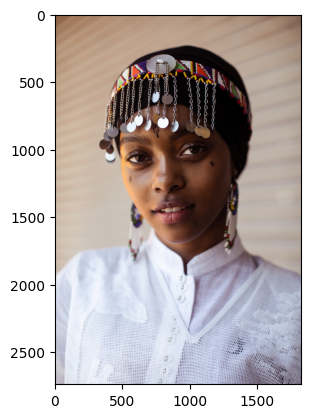

In [ ]:
plt.imshow(image)

## Channel First image plotting

In [ ]:
from torchvision import datasets, transforms

In [ ]:
transform=transforms.Compose([transforms.ToTensor()])
cifar10_dataset = datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 60715426.30it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
cifar10_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
cifar10_dataset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [ ]:
image1,label1=cifar10_dataset[0]
image1.shape

torch.Size([3, 32, 32])

In [ ]:
image1.shape[0]

3

TypeError: ignored

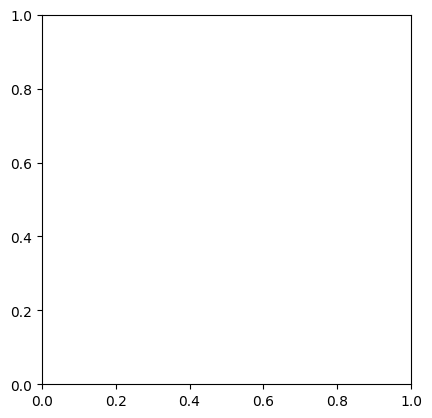

In [ ]:
plt.imshow(image1)

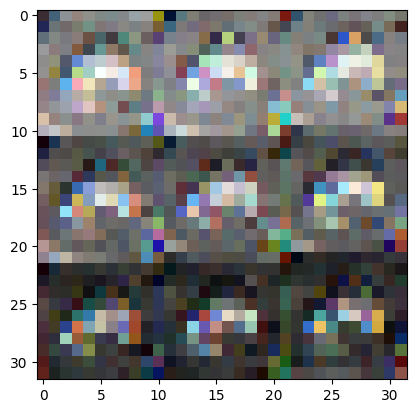

In [ ]:
plt.imshow(image1.view(32,32,3)) # have to convert to channel-last bcz no image plotting support channel-first

**Note:** No image plotting library supports channel first pattern so tensor must be converted to channel last before plotting it.

## Image plotting with width and height dimensions swapped

In [ ]:
image.shape

(2738, 1825, 3)

In [ ]:
w_h_swapped_image=image.transpose(1,0,2)
w_h_swapped_image.shape

(1825, 2738, 3)

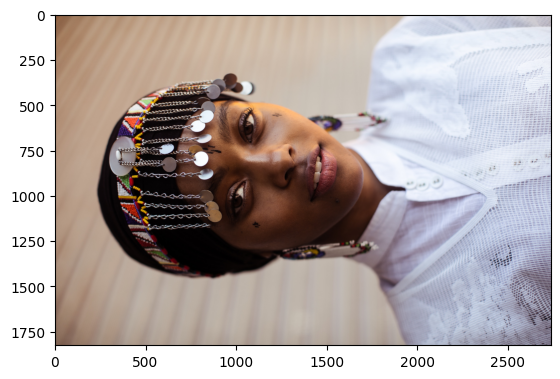

In [ ]:
plt.imshow(w_h_swapped_image)

**Observation:** Changing dimensions order only change direction of information appearing but information remains intact

## Reshaped image plotting

In [ ]:
image.shape

(2738, 1825, 3)

In [ ]:
reshaped_image=image.reshape(1,(2738*1825),3)

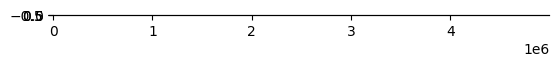

In [ ]:
plt.imshow(reshaped_image)

In [ ]:
reshaped_image1=image.reshape((2738*1825),1,3)

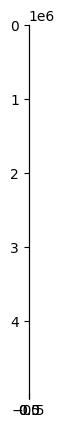

In [ ]:
plt.imshow(reshaped_image1)

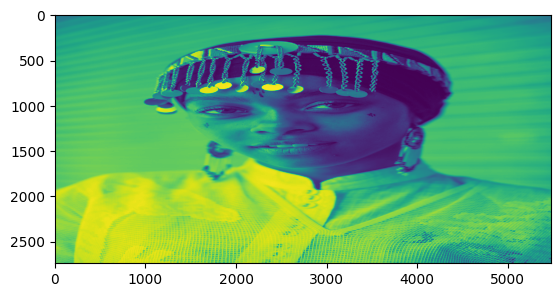

In [ ]:
# changed to grayscale by setting last channel to 1
# width increased three times
reshaped_image2=image.reshape(2738,1825*3,1)
plt.imshow(reshaped_image2)

**Observation:** Reshaping image lead to information structure loss


**Detail:**
Reshaping an image can lead to information loss, especially if the reshaping involves a change in the number of pixels or a significant alteration in the aspect ratio. When you reshape an image, you are essentially rearranging the pixel values, and the new shape might not accurately represent the original content.

For example, if you have a square image and you reshape it into a rectangle, you might distort the proportions of the objects in the image. Similarly, if you flatten an image into a one-dimensional array (e.g., using `reshape(-1)`), you lose the spatial relationships between pixels.

In the context of deep learning and image processing, it's crucial to be mindful of how you reshape images, especially when working with convolutional neural networks (CNNs) or other models that expect input in a specific format. Reshaping images without considering the implications can lead to poor model performance.

If you need to resize or reshape images, consider using interpolation techniques to maintain the visual content as much as possible. Libraries like OpenCV or Pillow provide functions for resizing images with different interpolation methods, which can help mitigate information loss.

In summary, while reshaping itself doesn't inherently cause information loss, the way you reshape and the extent of the changes made can impact the fidelity of the visual information in the image.

## Adding a Channel to a Grayscale Image

In [ ]:
from numpy.lib.type_check import imag
from PIL import Image
from numpy import expand_dims, asarray
#load image
img=Image.open('/content/drive/MyDrive/pytorch_understanding/media/dimension_change_impact_img.jpg')

In [ ]:
#convert image to grayscale
img=img.convert(mode='L')

In [ ]:
#convert to numpy array
data=asarray(img)

In [ ]:
data.shape

(2738, 1825)

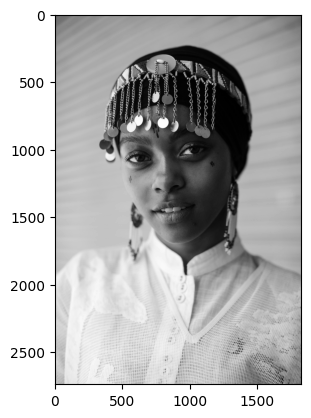

In [ ]:
plt.imshow(data,cmap='gray') #no channel plotting

In [ ]:
channel_first=expand_dims(data,axis=0)

In [ ]:
channel_first.shape

(1, 2738, 1825)

TypeError: ignored

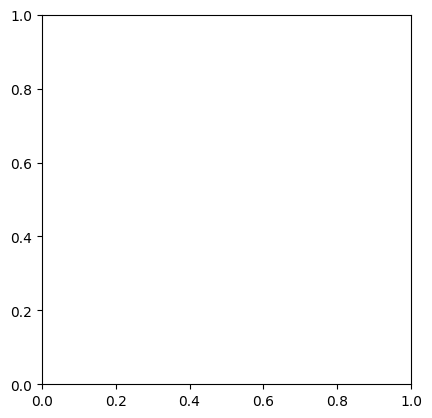

In [ ]:
plt.imshow(channel_first, cmap='gray')

In [ ]:
channel_last=expand_dims(data,axis=2)

In [ ]:
channel_last.shape

(2738, 1825, 1)

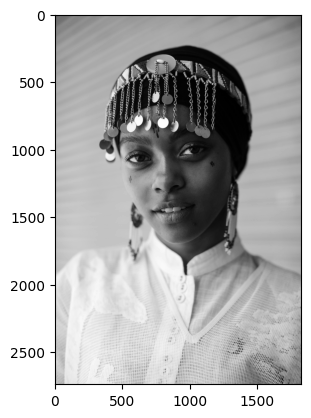

In [ ]:
plt.imshow(channel_last,cmap='gray')

## Grayscale one channel to three channels

In [ ]:
channel_last.shape

(2738, 1825, 1)

In [ ]:
channel_last_tensor=torch.tensor(channel_last)

In [ ]:
import torch
grey_with_three_channels=torch.cat([channel_last_tensor,channel_last_tensor,channel_last_tensor],dim=2)
grey_with_three_channels.shape

torch.Size([2738, 1825, 3])

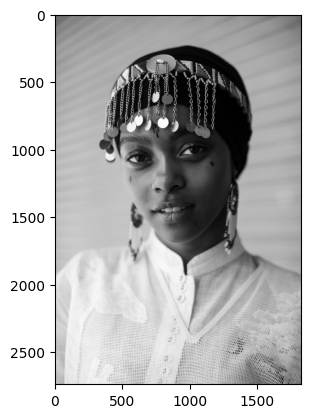

In [ ]:
plt.imshow(grey_with_three_channels)

**Observation:** Adding Channel does not affect the image information

* image needs structure following, so if flatten data is given then flatten will be maintained. Channel has to be maintained in image unlike other data types whose